In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from numpy.ma.core import argmax

from sklearn.manifold import TSNE

plt.rcParams['figure.figsize'] = 10, 10

In [2]:
# Initializing the transform for the dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5), (0.5))
])

# Downloading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True)

test_dataset = torchvision.datasets.MNIST(
    root="./data", train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True)

In [17]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [3]:
def encode_label(j):
    # 5 -> [[0], [0], [0], [0], [0], [1], [0], [0], [0], [0]]
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


def shape_data(data):
    features = [np.reshape(x[0][0].numpy(), (784, 1)) for x in data]
    labels = [encode_label(y[1]) for y in data]
    return zip(features, labels)


def average_digit(data, digit):
    filtered_data = [x[0] for x in data if np.argmax(x[1]) == digit]
    filtered_array = np.asarray(filtered_data)
    return np.average(filtered_array, axis=0)


test1 = train_dataset[0]

test2 = [test1]
reshape = shape_data(test2)
list(reshape)

train = shape_data(train_dataset)
test = shape_data(test_dataset)

train = list(train)
test = list(test)

avgs = {}

for digit in range(0, 10):
    avg_digit = average_digit(train, digit)

    avgs[digit] = np.transpose(avg_digit)

In [16]:
train[3][0]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [5]:
b = 0


def model(x):
    dt = []
    for d in range(0, 10):
        dt.append((np.dot(avgs[d], x) + b) / np.linalg.norm(avgs[d]))

    r = np.zeros(10)
    r[np.argmax(dt)] = 1
    return r


model(train[3][0])

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
precisions = []
recalls = []
accuracies = []

for cls in range(0, 10):  # целевой класс
    tp = 0
    fp = 0
    fn = 0
    tn = 0

    x_feature_vectors_cls = []

    for i in range(len(test)):
        predict = model(test[i][0])[cls]
        real = test[i][1][cls]

        if predict == 1 and real == 1:
            tp += 1
        elif predict == 0 and real == 0:
            tn += 1
        elif predict == 0 and real == 1:
            fn += 1
        elif predict == 1 and real == 0:
            fp += 1

    precisions.append(tp / (tp + fp))
    recalls.append(tp / (tp + fn))
    accuracies.append((tp + tn) / (tp + fn + fp + tn))

print(np.mean(accuracies))
print(np.mean(precisions))
print(np.mean(recalls))

0.9643200000000001
0.823176533189155
0.8185417873807783


In [7]:
for i in range(len(precisions)):
    print(precisions[i], recalls[i])

0.8707810993249759 0.9214285714285714
0.8637469586374696 0.9383259911894273
0.8679867986798679 0.7645348837209303
0.7445319335083115 0.8425742574257425
0.8207253886010363 0.8065173116089613
0.8118811881188119 0.6434977578475336
0.860488798370672 0.8820459290187892
0.9158576051779935 0.8258754863813229
0.7217898832684825 0.7618069815195072
0.7539756782039289 0.798810703666997


In [8]:
n_classes = 10
samples_per_class = 30
X_selected = []
y_selected = []

for class_label in range(n_classes):
    class_samples = [test[i][0] for i in range(len(test)) if np.argmax(test[i][1]) == class_label][:samples_per_class]

    X_selected.append(class_samples)
    y_selected.append(np.full(samples_per_class, class_label))

X_selected = np.vstack(X_selected)
y_selected = np.hstack(y_selected)
y_selected

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

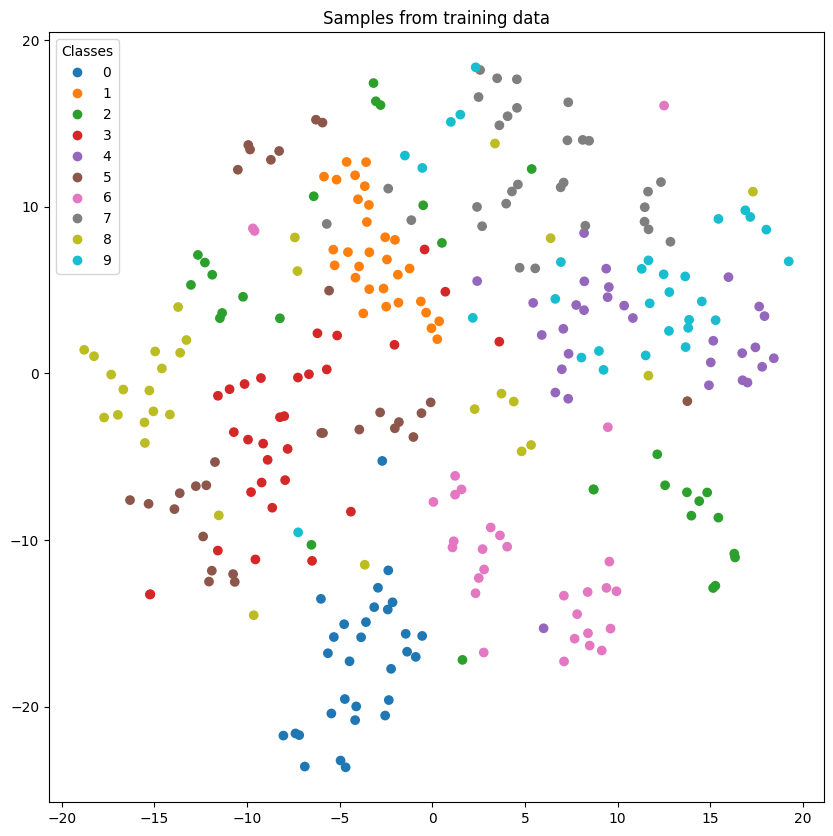

In [9]:
nsamples, nx, ny = X_selected.shape
d2_X_selected = X_selected.reshape((nsamples, nx * ny))

tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(d2_X_selected)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_selected, cmap='tab10')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("Samples from training data")
plt.show()

In [10]:
n_classes = 10
samples_per_class = 20
X_selected = []
y_selected = []

for class_label in range(n_classes):
    class_samples = [[model(test[i][0])] for i in range(len(test)) if np.argmax(test[i][1]) == class_label][
                    :samples_per_class]

    X_selected.append(class_samples)
    for i in range(samples_per_class):
        y_selected.append(np.argmax(class_samples[i][0]))

X_selected = np.vstack(X_selected)
y_selected = np.hstack(y_selected)
y_selected

array([0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2,
       2, 2, 7, 2, 2, 2, 2, 6, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 1, 3, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 9, 4, 4, 4, 4, 4, 9, 9, 4, 6, 2, 3, 5, 3, 5, 3, 5, 5, 3, 5,
       5, 5, 5, 5, 5, 5, 3, 4, 5, 3, 0, 6, 6, 6, 2, 2, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7,
       1, 1, 7, 7, 4, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 7, 8, 1, 8,
       8, 3, 8, 4, 9, 9, 9, 9, 7, 9, 9, 8, 8, 8, 9, 4, 9, 9, 9, 9, 9, 9,
       9, 9])

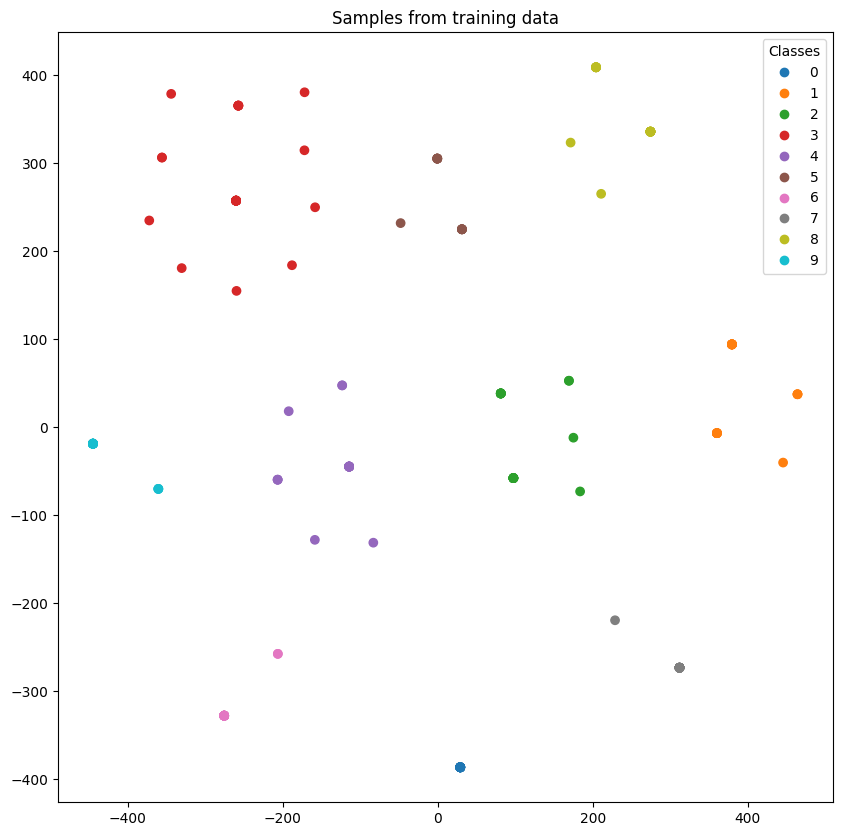

In [11]:
nsamples, nx, ny = X_selected.shape
d2_X_selected = X_selected.reshape((nsamples, nx * ny))

tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(d2_X_selected)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_selected, cmap='tab10')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("Samples from training data")
plt.show()

In [ ]:
while 1 == (2 + 3 - 4):
    pass
